In [1]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import ast
from datetime import datetime, timedelta
import seaborn as sns
#sns.set()
#sns.set_style("white")
#sns.set_palette("GnBu_d")
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_pickle("preparedData.pkl")
#save the original data 
original = pd.read_pickle("preparedData.pkl")

data

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,combinedSpaceStationID,timeConnected,idleTime,chargingTime,weekday,month,time,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,AG-3F30/1-1-179-810,21741.0,5980.0,15761.0,3,1,13:08:54,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,AG-1F01/1-1-193-825,32491.0,8416.0,24075.0,3,1,13:36:50,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,AG-1F03/1-1-193-829,38567.0,29056.0,9511.0,3,1,13:56:35,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,AG-1F04/1-1-193-820,9521.0,4794.0,4727.0,3,1,13:59:58,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,AG-1F06/1-1-193-819,29319.0,13870.0,15449.0,3,1,14:00:01,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56531,2019-07-01 19:13:11+00:00,2019-07-02 00:44:40+00:00,2019-07-01 21:13:56+00:00,6.048,1,2643.0,AG-3F23/1-1-179-797,19889.0,12644.0,7245.0,0,7,19:13:11,275.0,8.25,30.0,374.0,"Mon, 01 Jul 2019 19:13:10 GMT",True,"Tue, 02 Jul 2019 01:27:11 GMT"
56532,2019-07-01 19:43:46+00:00,2019-07-02 02:58:53+00:00,2019-07-02 02:43:53+00:00,41.047,1,394.0,AG-4F38/1-1-191-793,26107.0,900.0,25207.0,0,7,19:43:46,231.0,36.96,160.0,310.0,"Mon, 01 Jul 2019 19:43:58 GMT",True,"Tue, 02 Jul 2019 00:53:46 GMT"
56533,2019-07-01 20:34:30+00:00,2019-07-02 00:30:52+00:00,2019-07-01 21:27:44+00:00,5.390,1,2276.0,AG-3F15/1-1-179-813,14182.0,10988.0,3194.0,0,7,20:34:30,300.0,12.00,40.0,381.0,"Mon, 01 Jul 2019 20:34:29 GMT",True,"Tue, 02 Jul 2019 02:55:30 GMT"
56534,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1,1346.0,AG-3F18/1-1-179-798,13686.0,8565.0,5121.0,0,7,21:49:12,400.0,32.00,80.0,36.0,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT"


In [3]:
#get the prepared data of the utilization per site
site2=pd.read_pickle("utilization_data_site2_complete.pkl")
site1=pd.read_pickle("utilization_data_site1_complete.pkl")
site1

,date,hour,weekday,month,holiday,dateHour,utilization
13,2018-10-08 13:01:34+00:00,13,0,10,True,2018-10-8+13,0.076923
14,2018-10-08 13:01:34+00:00,14,0,10,True,2018-10-8+14,0.365385
15,2018-10-08 13:01:34+00:00,15,0,10,True,2018-10-8+15,0.365385
16,2018-10-08 13:01:34+00:00,16,0,10,True,2018-10-8+16,0.365385
17,2018-10-08 13:01:34+00:00,17,0,10,True,2018-10-8+17,0.365385
...,...,...,...,...,...,...,...
25747,2021-09-14 13:01:34+00:00,19,1,9,False,2021-9-14+19,0.000000
25748,2021-09-14 13:01:34+00:00,20,1,9,False,2021-9-14+20,0.000000
25749,2021-09-14 13:01:34+00:00,21,1,9,False,2021-9-14+21,0.000000
25750,2021-09-14 13:01:34+00:00,22,1,9,False,2021-9-14+22,0.000000


In [4]:
site2

,date,hour,weekday,month,holiday,dateHour,utilization
13,2018-04-25 13:45:10+00:00,13,2,4,False,2018-4-25+13,0.037037
14,2018-04-25 13:45:10+00:00,14,2,4,False,2018-4-25+14,0.129630
15,2018-04-25 13:45:10+00:00,15,2,4,False,2018-4-25+15,0.388889
16,2018-04-25 13:45:10+00:00,16,2,4,False,2018-4-25+16,0.537037
17,2018-04-25 13:45:10+00:00,17,2,4,False,2018-4-25+17,0.555556
...,...,...,...,...,...,...,...
29722,2021-09-14 13:45:10+00:00,10,1,9,False,2021-9-14+10,0.000000
29723,2021-09-14 13:45:10+00:00,11,1,9,False,2021-9-14+11,0.000000
29724,2021-09-14 13:45:10+00:00,12,1,9,False,2021-9-14+12,0.000000
29725,2021-09-14 13:45:10+00:00,13,1,9,False,2021-9-14+13,0.000000


In [5]:
#Shift the hour values of the site to GMT 8 time 

site1["hour"] = (site1["hour"] - 8) % 24
site1["hour"]= site1["hour"].astype(int)

site2["hour"] = (site2["hour"] - 8) % 24
site2["hour"]= site2["hour"].astype(int)

site1["year"] = site1["date"].dt.year
site2["year"] = site2["date"].dt.year

site1

,date,hour,weekday,month,holiday,dateHour,utilization,year
13,2018-10-08 13:01:34+00:00,5,0,10,True,2018-10-8+13,0.076923,2018
14,2018-10-08 13:01:34+00:00,6,0,10,True,2018-10-8+14,0.365385,2018
15,2018-10-08 13:01:34+00:00,7,0,10,True,2018-10-8+15,0.365385,2018
16,2018-10-08 13:01:34+00:00,8,0,10,True,2018-10-8+16,0.365385,2018
17,2018-10-08 13:01:34+00:00,9,0,10,True,2018-10-8+17,0.365385,2018
...,...,...,...,...,...,...,...,...
25747,2021-09-14 13:01:34+00:00,11,1,9,False,2021-9-14+19,0.000000,2021
25748,2021-09-14 13:01:34+00:00,12,1,9,False,2021-9-14+20,0.000000,2021
25749,2021-09-14 13:01:34+00:00,13,1,9,False,2021-9-14+21,0.000000,2021
25750,2021-09-14 13:01:34+00:00,14,1,9,False,2021-9-14+22,0.000000,2021


**Comment**: In the following we strip the date_time object of the connection time into int values seperately to: hour weekday and month
we also shift the hour time to GMT +8 Time 

In [6]:
data["hour_connecttime"] = data["connectionTime"].dt.hour
data["hour_disconnecttime"] = data["disconnectTime"].dt.hour

data['date_connecttime'] = data['connectionTime'].dt.date
data['weekday_connecttime'] = data['connectionTime'].dt.weekday
data['month_connecttime'] = data['connectionTime'].dt.month
data["chargingTime_minutes"] = data["chargingTime"]/60


data["hour_connecttime"] = (data["hour_connecttime"] - 8) % 24
data["hour_connecttime"]= data["hour_connecttime"].astype(int)

data["hour_disconnecttime"] = (data["hour_disconnecttime"] - 8) % 24
data["hour_disconnecttime"]= data["hour_disconnecttime"].astype(int)


In [7]:
original["hour_connecttime"] = original["connectionTime"].dt.hour
original["hour_disconnecttime"] = original["disconnectTime"].dt.hour

original['date_connecttime'] = original['connectionTime'].dt.date
original['weekday_connecttime'] = original['connectionTime'].dt.weekday
original['month_connecttime'] = original['connectionTime'].dt.month
original["chargingTime_minutes"] = original["chargingTime"]/60


original["hour_connecttime"] = (original["hour_connecttime"] - 8) % 24
original["hour_connecttime"]= original["hour_connecttime"].astype(int)

original["hour_disconnecttime"] = (original["hour_disconnecttime"] - 8) % 24
original["hour_disconnecttime"]= original["hour_disconnecttime"].astype(int)


In [8]:
#create a second df with only unregistered users
unregistered_df = data[data['userID'].isnull()]
#drop the userinput since the values for unregistered users is null
unregistered_df = unregistered_df.drop(['userID', 'kWhDelivered','kWhRequested','milesRequested','WhPerMile','minutesAvailable','modifiedAt','paymentRequired','requestedDeparture'], axis=1)

In [9]:
unregistered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15227 entries, 11 to 56493
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          15227 non-null  datetime64[ns, UTC]
 1   disconnectTime          15227 non-null  datetime64[ns, UTC]
 2   doneChargingTime        15227 non-null  datetime64[ns, UTC]
 3   siteID                  15227 non-null  int64              
 4   combinedSpaceStationID  15227 non-null  object             
 5   timeConnected           15227 non-null  float64            
 6   idleTime                15227 non-null  float64            
 7   chargingTime            15227 non-null  float64            
 8   weekday                 15227 non-null  int32              
 9   month                   15227 non-null  int32              
 10  time                    15227 non-null  object             
 11  hour_connecttime        15227 non-null  int32

In [10]:
#drop all null values therefore also the unregistered users
registered_df=data.dropna()

# only registered users are left in this dataset
registered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41309 entries, 0 to 56535
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          41309 non-null  datetime64[ns, UTC]
 1   disconnectTime          41309 non-null  datetime64[ns, UTC]
 2   doneChargingTime        41309 non-null  datetime64[ns, UTC]
 3   kWhDelivered            41309 non-null  float64            
 4   siteID                  41309 non-null  int64              
 5   userID                  41309 non-null  float64            
 6   combinedSpaceStationID  41309 non-null  object             
 7   timeConnected           41309 non-null  float64            
 8   idleTime                41309 non-null  float64            
 9   chargingTime            41309 non-null  float64            
 10  weekday                 41309 non-null  int32              
 11  month                   41309 non-null  int32 

### KPI 1 Utilization

Site Utilization 

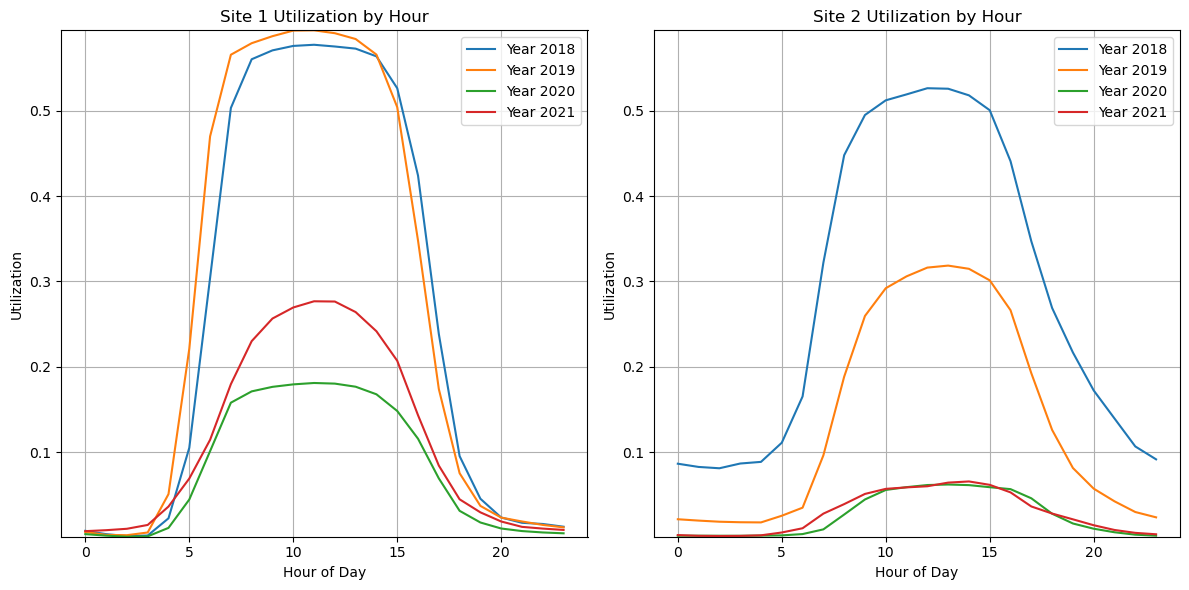

In [11]:
import matplotlib.pyplot as plt


# Group the data in site1 by 'year' and 'hour' and calculate the mean utilization for each group
site1_utilization_by_year_hour = site1.groupby(['year', 'hour'])['utilization'].mean().reset_index()

# Group the data in site2 by 'year' and 'hour' and calculate the mean utilization for each group
site2_utilization_by_year_hour = site2.groupby(['year', 'hour'])['utilization'].mean().reset_index()

years = site1_utilization_by_year_hour['year'].unique()

# for a better comparison making sure that both plots have the same scale
min_utilization = min(
    site1_utilization_by_year_hour['utilization'].min(),
    site2_utilization_by_year_hour['utilization'].min()
)
max_utilization = max(
    site1_utilization_by_year_hour['utilization'].max(),
    site2_utilization_by_year_hour['utilization'].max()
)


plt.figure(figsize=(12, 6))

# Plot for Site 1
plt.subplot(1, 2, 1)
for year in years:
    site1_year_data = site1_utilization_by_year_hour[site1_utilization_by_year_hour['year'] == year]
    plt.plot(site1_year_data['hour'], site1_year_data['utilization'], label=f'Year {year}')

plt.xlabel('Hour of Day')
plt.ylabel('Utilization')
plt.title('Site 1 Utilization by Hour')
plt.legend()
plt.grid(True)
plt.ylim(min_utilization, max_utilization)

# Plot for Site 2
plt.subplot(1, 2, 2)
for year in years:
    site2_year_data = site2_utilization_by_year_hour[site2_utilization_by_year_hour['year'] == year]
    plt.plot(site2_year_data['hour'], site2_year_data['utilization'], label=f'Year {year}')

plt.xlabel('Hour of Day')
plt.ylabel('Utilization')
plt.title('Site 2 Utilization by Hour')
plt.legend()
plt.grid(True)
plt.ylim(min_utilization, max_utilization)  # Set y-axis limits

plt.tight_layout()
plt.savefig("SiteUtilization.png")
plt.show()


Reason: This KPI visualizes the charging duration
Calculation: Charging Duration=ConnectionTime-DoneChargingTime

### KPI 2 Session duration

**Reason:** This KPI visualizes the session duration
**Calculation:** Session Duration=ConnectionTime-DisconnectTime

<ipython-input-12-64fda513dd4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registered_df['timeConnected_minutes']=(registered_df['timeConnected']/60)


Average Session Duration by registered users: 412.79105965608784
Average Session Duration by unregistered users: 335.8986504235897


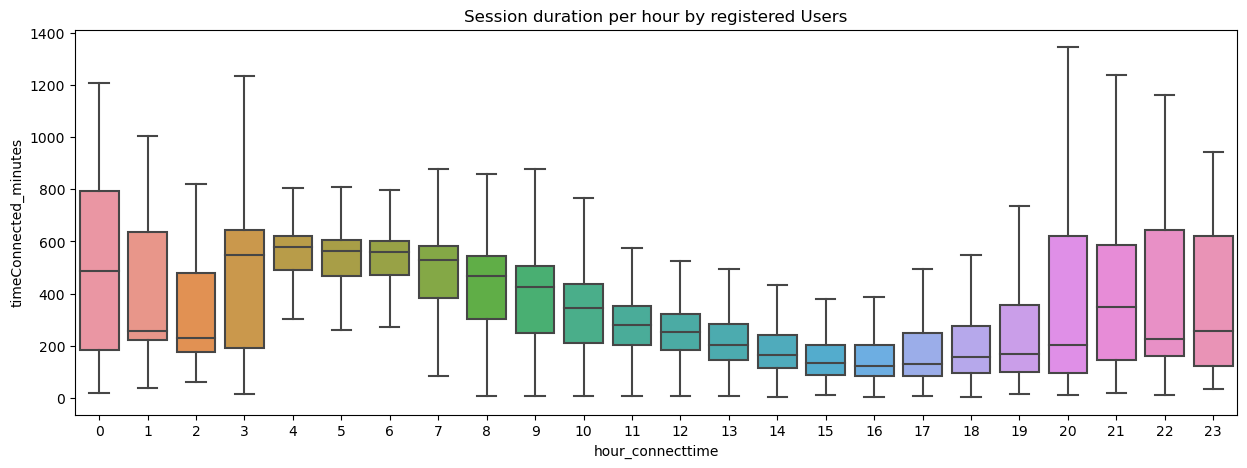

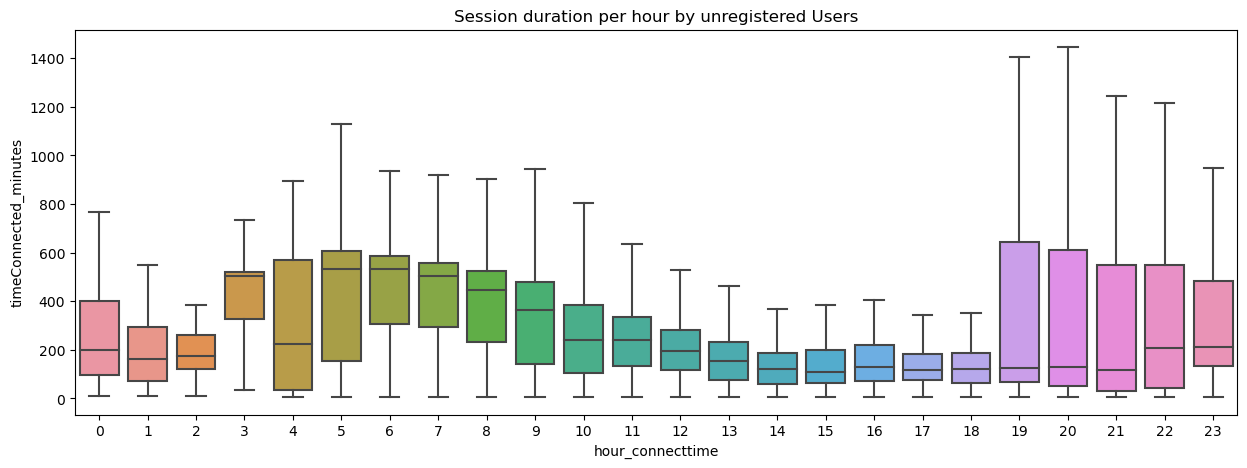

In [12]:
registered_df['timeConnected_minutes']=(registered_df['timeConnected']/60)
avg_session_duration = registered_df['timeConnected_minutes'].mean()
registered_avg_duration_per_hour = registered_df.groupby('hour_connecttime')['timeConnected_minutes'].mean()
# Print the average session duration
print("Average Session Duration by registered users:", avg_session_duration)

#
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour_connecttime", y = "timeConnected_minutes", data= registered_df, ax=axes, showfliers=False)
#sns.lineplot(x=registered_avg_duration_per_hour.index, y=registered_avg_duration_per_hour.values, label='Registered Users')

axes.set_title("Session duration per hour by registered Users")

plt.savefig("SessionDuration_R.png")

f, axes = plt.subplots(1, 1, figsize=(15, 5))
unregistered_df['timeConnected_minutes']=(unregistered_df['timeConnected']/60)
avg_session_duration = unregistered_df['timeConnected_minutes'].mean()
unregistered_avg_duration_per_hour = unregistered_df.groupby('hour_connecttime')['timeConnected_minutes'].mean()


sns.boxplot(x = "hour_connecttime", y = "timeConnected_minutes", data= unregistered_df, ax=axes, showfliers=False)
#sns.lineplot(x=unregistered_avg_duration_per_hour.index, y=unregistered_avg_duration_per_hour.values, label='Unregistered Users')

axes.set_title("Session duration per hour by unregistered Users")
# Anzeigen oder Verwenden der durchschnittlichen Dauer einer Session
print("Average Session Duration by unregistered users:", avg_session_duration)
plt.savefig("SessionDuration_U.png")



### KPI 3 Idle time

**Reason:** This KPI visualizes the session duration
**Calculation:** Idle Duration=DisconnectTime-DoneChargingTime

In [13]:
registered_df["idleTime_minutes"] = registered_df["idleTime"]/60
unregistered_df["idleTime_minutes"] = unregistered_df["idleTime"]/60

<ipython-input-13-97ff6a9befac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registered_df["idleTime_minutes"] = registered_df["idleTime"]/60


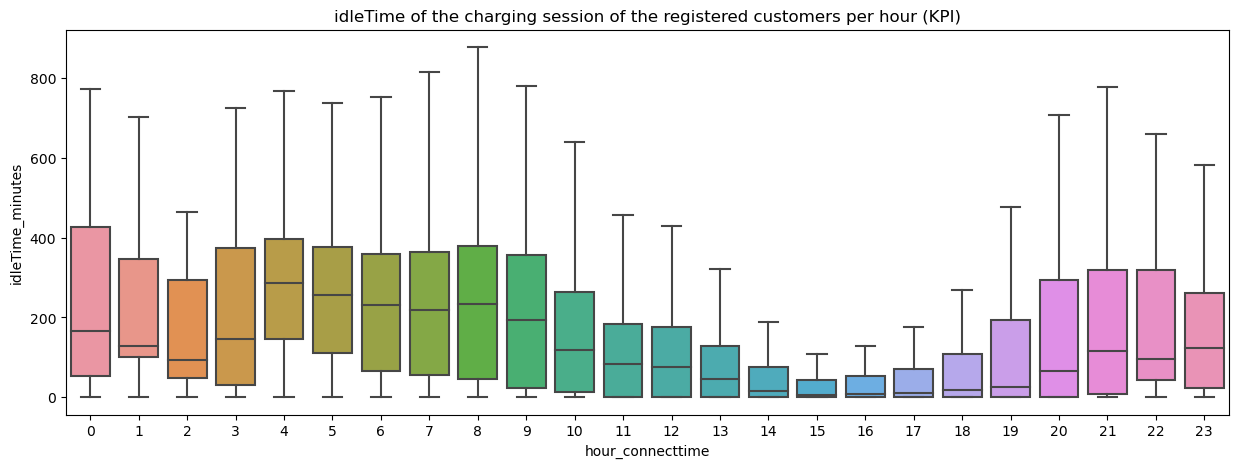

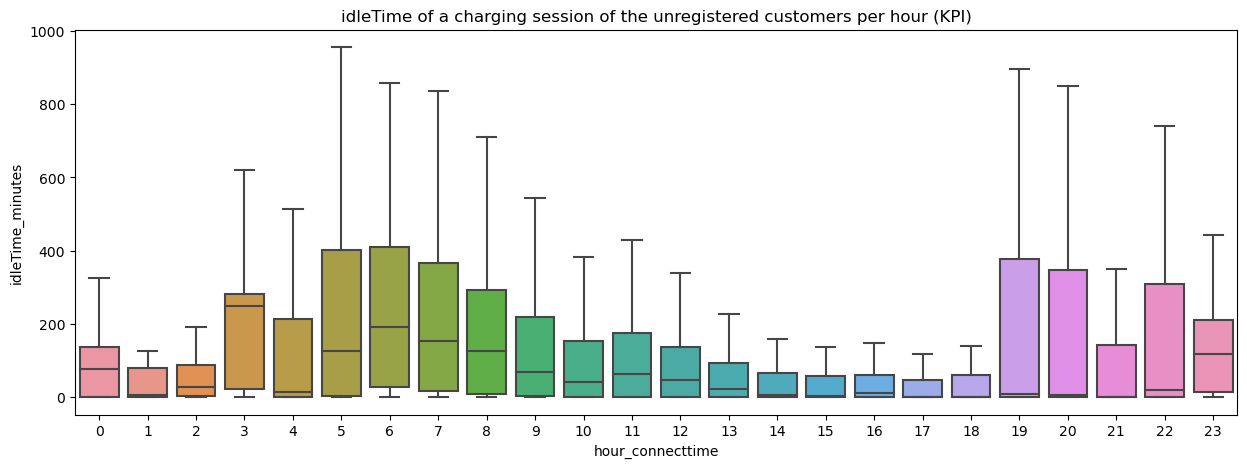

In [14]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

#create a boxplot for registered users to see the hourly ditribution of the idle time
sns.boxplot(x = "hour_connecttime", y = "idleTime_minutes", data= registered_df, ax=axes, showfliers=False)
axes.set_title("idleTime of the charging session of the registered customers per hour (KPI)")
plt.savefig("IdleTime_R.png")

#unregistered users
f, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.boxplot(x = "hour_connecttime", y = "idleTime_minutes", data= unregistered_df, ax=axes, showfliers=False)
axes.set_title("idleTime of a charging session of the unregistered customers per hour (KPI)")
plt.savefig("IdleTime_U.png")


### KPI 4: Genral Demand
Number of connections per hour. Intends to find demand patterns. For understanding the user behaviour

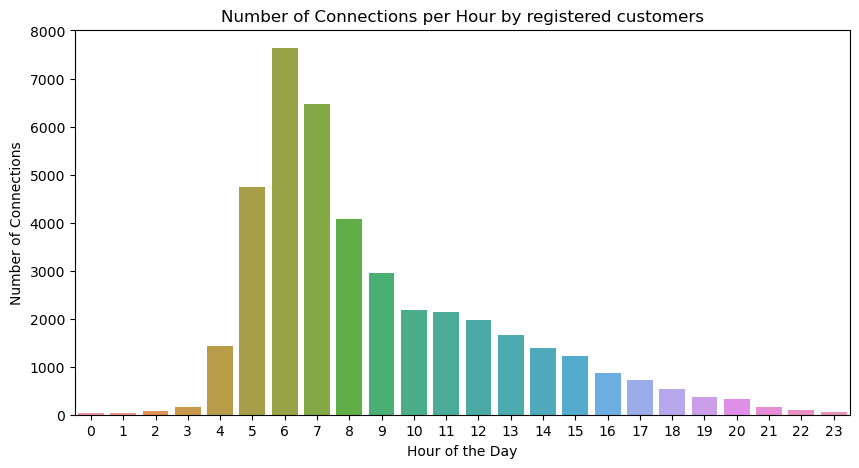

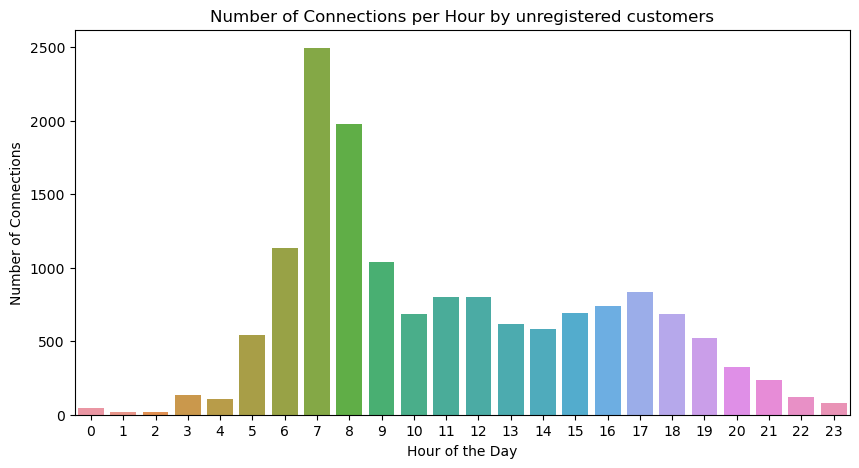

In [15]:
# Group the data by the 'hour' column and count the number of connections
connections_per_hour = registered_df.groupby('hour_connecttime').size().reset_index(name='Number of Connections')

plt.figure(figsize=(10, 5))
sns.barplot(x='hour_connecttime', y='Number of Connections', data=connections_per_hour)
plt.title('Number of Connections per Hour by registered customers')
plt.ylabel('Number of Connections')
plt.xlabel('Hour of the Day')
plt.savefig("GeneralDemand_R.png")
plt.show()


# Group the data by the 'hour' column and count the number of connections
connections_per_hour = unregistered_df.groupby('hour_connecttime').size().reset_index(name='Number of Connections')

plt.figure(figsize=(10, 5))
sns.barplot(x='hour_connecttime', y='Number of Connections', data=connections_per_hour)
plt.title('Number of Connections per Hour by unregistered customers')
plt.ylabel('Number of Connections')
plt.xlabel('Hour of the Day')
plt.savefig("GeneralDemand_U.png")
plt.show()


**Comparison**: A comparison of those two plots is especially more appealing with a simple line plot

Registered to Unregistered Customers Ratio: 2.712878439613844


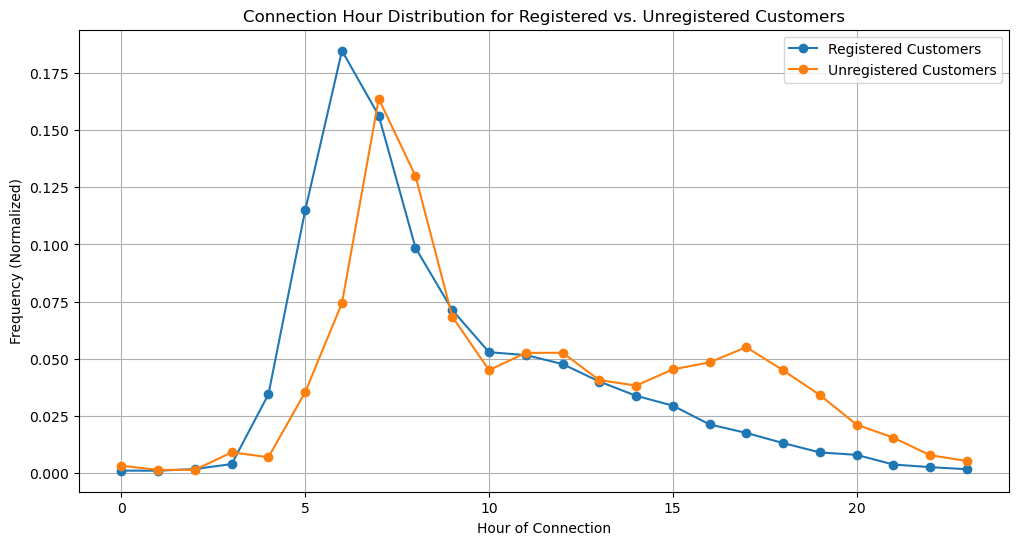

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate registered and unregistered customers it somehow was easier working with one df therefore the original df was used
registered_customers = original[original['userID'].notnull()]
unregistered_customers = original[original['userID'].isnull()]

# Calculate the ratio of registered to unregistered customers
registered_count = len(registered_customers)
unregistered_count = len(unregistered_customers)
registered_to_unregistered_ratio = registered_count / unregistered_count

print("Registered to Unregistered Customers Ratio:", registered_to_unregistered_ratio)

# Analyze when registered users typically connect compared to unregistered users
registered_hourly_distribution = registered_customers['hour_connecttime'].value_counts(normalize=True).sort_index()
unregistered_hourly_distribution = unregistered_customers['hour_connecttime'].value_counts(normalize=True).sort_index()

# Plot the connection hours for registered and unregistered customers
plt.figure(figsize=(12, 6))
plt.plot(registered_hourly_distribution.index, registered_hourly_distribution.values, label='Registered Customers', marker='o')
plt.plot(unregistered_hourly_distribution.index, unregistered_hourly_distribution.values, label='Unregistered Customers', marker='o')
plt.xlabel('Hour of Connection')
plt.ylabel('Frequency (Normalized)')
plt.title('Connection Hour Distribution for Registered vs. Unregistered Customers')
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("RegisteredVsUnregisteredGeneralDemand.png")

plt.show()


This diagram clearly shows that the peak times of the two user groups are different but still similar. 
The peak time for registered users is only 6 am. The highest peak in demand for non-registered users is at 7 am.
While the demand of registered users decreases, there is another peak at 5 p.m. for non-registered users.

### KPI 5: Charging Duration

The actual charging time, which is often shorter than the total session duration, is the period the vehicle is actively charging.  This metric more accurately reflects the time needed to charge an EV.
Charging time=CompleteChargingTime-ConnectionTime

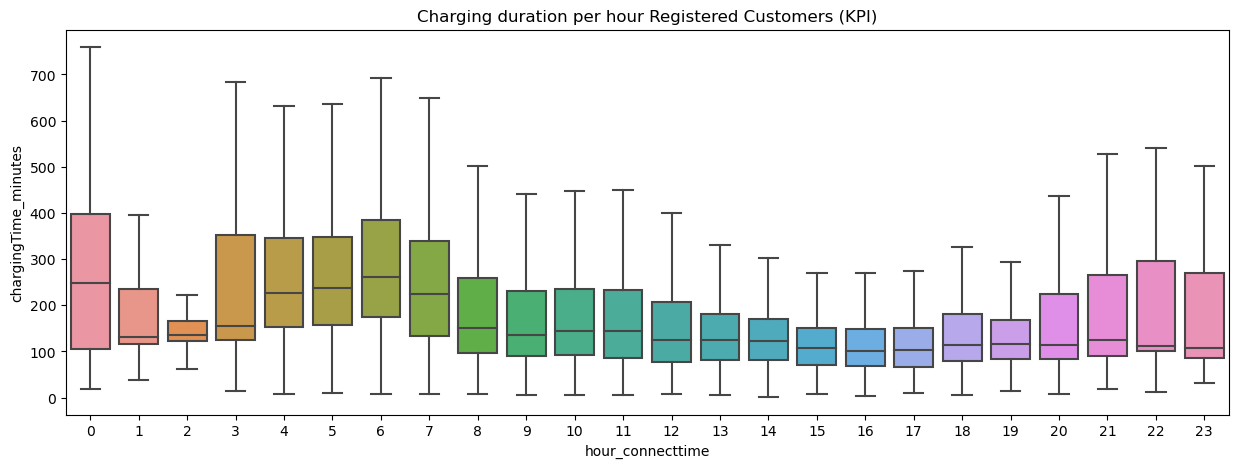

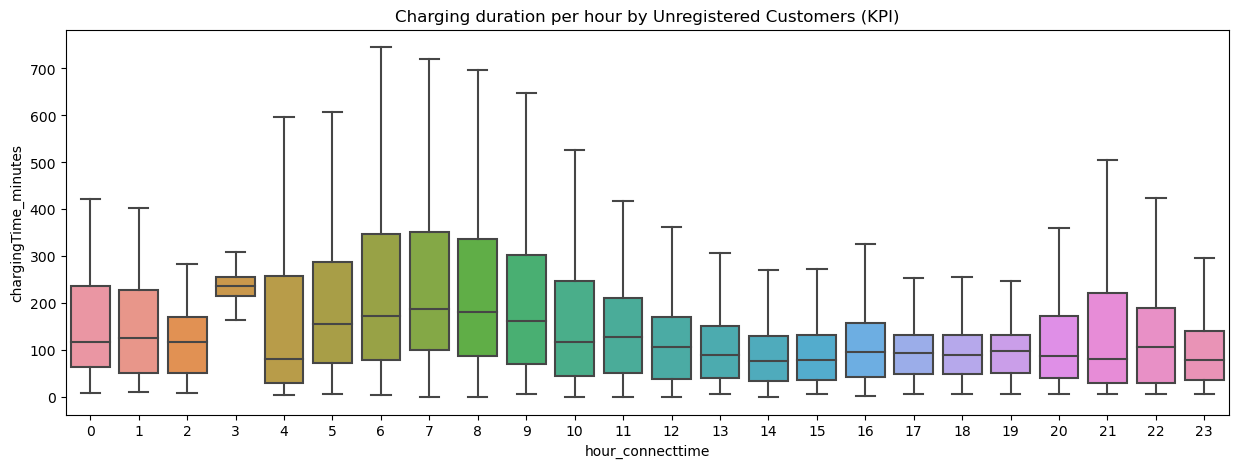

In [17]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))

#use a boxplot to display the duration of a charging session in minutes during for each hour
sns.boxplot(x = "hour_connecttime", y = "chargingTime_minutes", data= registered_df, ax=axes, showfliers=False)
axes.set_title("Charging duration per hour Registered Customers (KPI)")
plt.savefig("ChargingDuration_R.png")

f, axes = plt.subplots(1, 1, figsize=(15, 5))

#do it also for the unregistered users
avg_charging_duration = unregistered_df.groupby('hour_connecttime')['chargingTime_minutes'].mean()
sns.boxplot(x = "hour_connecttime", y = "chargingTime_minutes", data= unregistered_df, ax=axes,showfliers=False)
axes.set_title("Charging duration per hour by Unregistered Customers (KPI)")
plt.savefig("ChargingDuration_U.png")


### KPI 6: Proportion of the stations 

Proportion of the Stations gauges station occupancy.

In [18]:
number_stations = len(original["combinedSpaceStationID"].unique())
number_stations

106

In [19]:
#create a dataframe with the number of different stations IDs occupied every hour
charging_sessions_modified_tempered_hour123 = original.groupby([original["connectionTime"].dt.date,"hour_connecttime"])["combinedSpaceStationID"].nunique()
charging_sessions_modified_tempered_hour123= pd.DataFrame(charging_sessions_modified_tempered_hour123)

In [20]:
charging_sessions_modified_tempered_hour123

combinedSpaceStationID
connectionTime hour_connecttime                        
2018-04-25     5                                      2
               6                                      5
               7                                     14
               8                                      8
               9                                      1
...                                                 ...
2021-09-13     15                                     1
               16                                     1
               17                                     1
2021-09-14     17                                     1
               21                                     1

[13605 rows x 1 columns]

In this dataframe we see the number of different stations occupied every hour. In the next step we divide it with the number of stages to get the proportion in percent.

In [21]:
#insert a new column with the calculated proportion of the occupied stations borrowed every hour
charging_sessions_modified_tempered_hour123["percentage"]=(charging_sessions_modified_tempered_hour123["combinedSpaceStationID"]/number_stations)*100

In [22]:
charging_sessions_modified_tempered_hour123

combinedSpaceStationID  percentage
connectionTime hour_connecttime                                    
2018-04-25     5                                      2    1.886792
               6                                      5    4.716981
               7                                     14   13.207547
               8                                      8    7.547170
               9                                      1    0.943396
...                                                 ...         ...
2021-09-13     15                                     1    0.943396
               16                                     1    0.943396
               17                                     1    0.943396
2021-09-14     17                                     1    0.943396
               21                                     1    0.943396

[13605 rows x 2 columns]

As we can see a third column with percent values

In this dataframe we see the number of different stations occupied every hour. In the next step we divide it with the number of stages to get the proportion in percent.

Now we can plot it in a boxplot to the proportion of the stations occupied per day

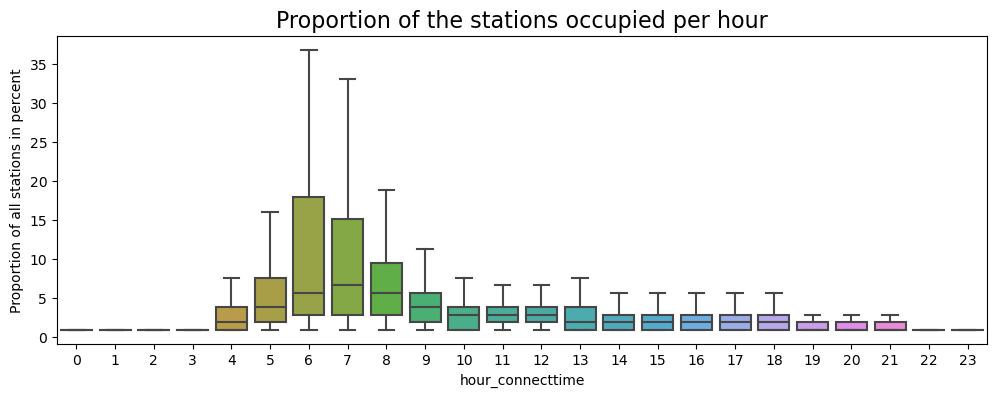

In [23]:
#plot the calculated proportion of the stations occupied per day
fig,ax = plt.subplots(figsize=(12,4)) 
sns.boxplot(x=charging_sessions_modified_tempered_hour123.index.get_level_values(1), y=charging_sessions_modified_tempered_hour123["percentage"],ax=ax, showfliers=False)
ax.set_title("Proportion of the stations occupied per hour",fontsize=16)
plt.ylabel('Proportion of all stations in percent')
plt.savefig("dayproportion_R.png")



This plot is also alligning with the ones before. The more Users there are the more stations are occupied.

### KPI 7: Kwh delivered 

This KPI tracks the average kilowatt-hours (kWh) delivered per hour, revealing patterns in charging demand and energy usage.

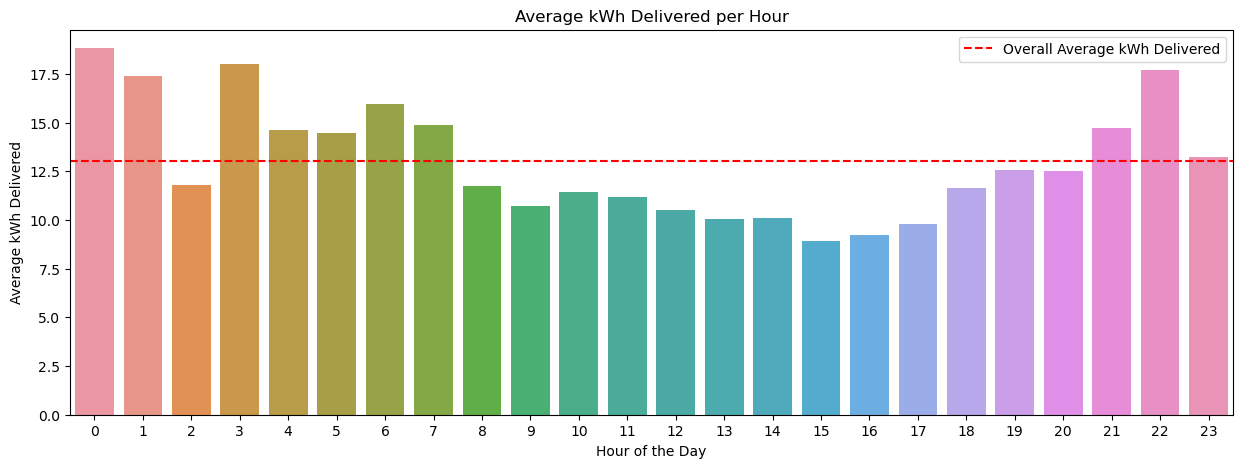

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate the average kWh delivered per hour - only possible for registered users (due to userinput)
avg_kwh_per_hour = registered_df.groupby('hour_connecttime')['kWhDelivered'].mean().reset_index()

# Calculate the overall average of kWh delivered
overall_avg_kwh = registered_df['kWhDelivered'].mean()

# Plotting the average kWh delivered per hour
plt.figure(figsize=(15, 5))
sns.barplot(x="hour_connecttime", y="kWhDelivered", data=avg_kwh_per_hour)
plt.title("Average kWh Delivered per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average kWh Delivered")

# Add a horizontal line for the overall average
plt.axhline(overall_avg_kwh, color='red', linestyle='--', label='Overall Average kWh Delivered')

# Adding a legend to explain the line
plt.legend()

plt.savefig("KwHDelivered.png")
plt.show()



Peak deliveries occur at 6 AM, 1 AM, and a secondary peak at 10 PM, with an average delivery of approximately 13 kWh per session.
The data suggests a higher kWh delivered per session during the night.


### KPI 8: Most utilized Stations 

The "Most Utilized Stations" KPI tracks the usage frequency of EV charging stations, guiding maintenance and expansion planning. It highlights the busiest and least busy stations, helping prioritize service reliability and resource allocation for network efficiency.

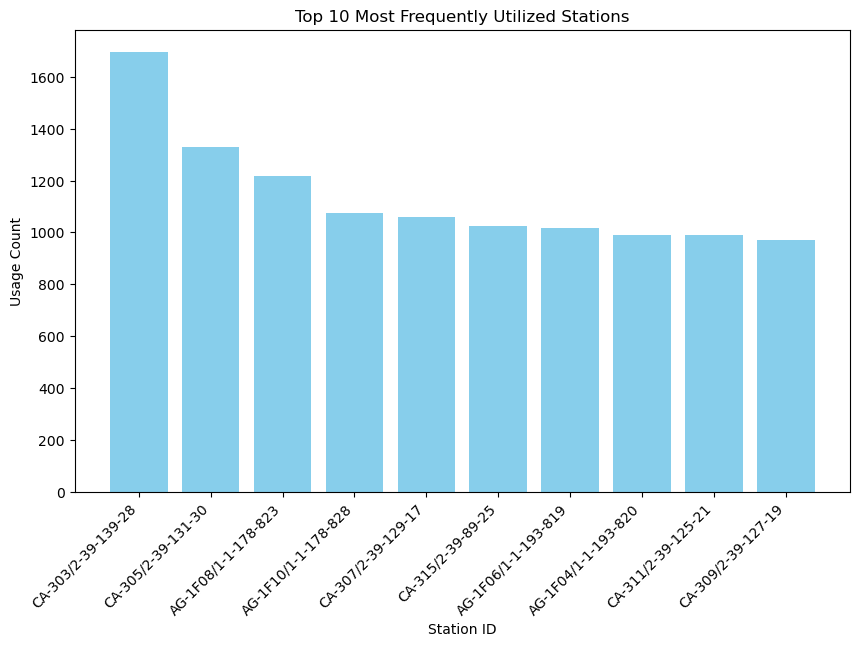

In [25]:
import matplotlib.pyplot as plt

# count of connections for each station
#using original df to see the overall most utilized stations
sorted_stations = original['combinedSpaceStationID'].value_counts()

sorted_stations = sorted_stations.sort_values(ascending=False)

#select top 10 stations with the highest count
station_ids = sorted_stations.index[:10] 
counts = sorted_stations.values[:10]

plt.figure(figsize=(10, 6))
plt.bar(station_ids, counts, color='skyblue')
plt.title('Top 10 Most Frequently Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.savefig("MostutilizedStations.png")
plt.show()


Business Suggestion: Add stations near the ones which are overly utilized  

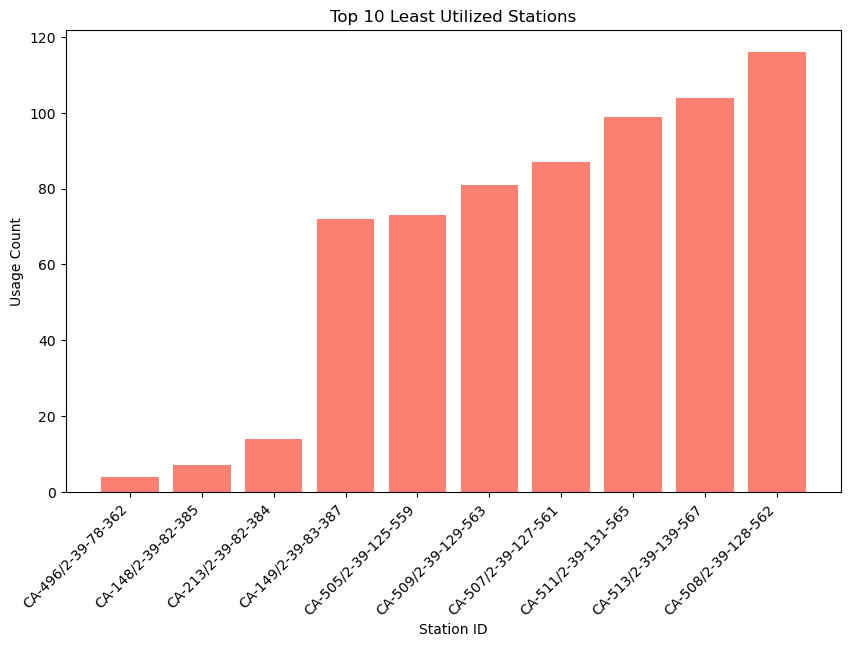

In [26]:
import matplotlib.pyplot as plt

# Sorting stations by usage count in ascending order for least utilized stations
sorted_stations_least = sorted_stations.sort_values(ascending=True)

#select top 10 stations with the least count
station_ids_least = sorted_stations_least.index[:10]  # Adjust the number to display more or fewer stations
counts_least = sorted_stations_least.values[:10]

plt.figure(figsize=(10, 6))
plt.bar(station_ids_least, counts_least, color='salmon')
plt.title('Top 10 Least Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right') 
plt.savefig("LeastutilizedStations.png")
plt.show()


Business Suggestion drop the non-necessary stations 

### KPI 9: Registered and Unregistered Customer Ratio
Compares the ratio of registered (loyal) customers to unregistered (casual) customers, providing insights into registration program effectiveness and customer retention.
Calculation: (Number of Registered Customers) / (Number of Unregistered Customers)



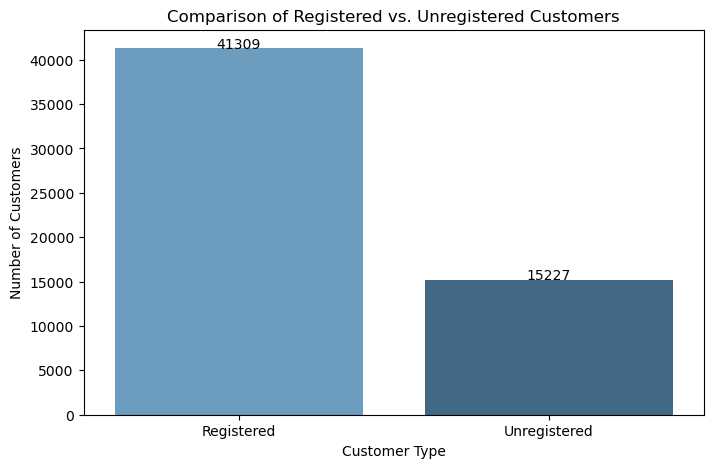

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mydata = {
    'Customer Type': ['Registered', 'Unregistered'],
    'Count': [registered_count, unregistered_count]
}
df = pd.DataFrame(mydata)

plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Type', y='Count', data=df, palette='Blues_d')

for index, row in df.iterrows():
    plt.text(row.name, row.Count, str(row.Count), color='black', ha="center")

plt.title('Comparison of Registered vs. Unregistered Customers')
plt.ylabel('Number of Customers')

plt.savefig("RegisteredVsUnregistered.png")

plt.show()
